In [1]:
import sys

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

sys.path.append("../")

In [2]:
import src.analysis as anly

In [3]:
X_train, X_test, y_train, y_test = anly.load_and_preprocess_data()
all_features = X_train.columns[2:-1].tolist()
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,-1.128206,-0.872563,0.006190,-0.212153,-0.795151,0.381743,-0.472560,-1.350194,-0.570750,1.049169,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,0.798404,0.073375,-0.493353,-0.268578,-0.071836,1.280685,0.719786,0.442586,-0.570750,-0.973018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,-0.217100,-0.636078,-0.130049,-0.174369,-0.795151,1.280685,-2.029235,-1.689368,-0.570750,-0.973018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,0.164901,-0.163109,-0.447940,-0.332419,-0.795151,1.280685,-1.134975,-1.689368,0.824062,0.274948,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,-0.829249,-0.163109,-0.902070,-0.552908,-0.795151,0.381743,-1.565545,-1.689368,-0.570750,-0.494887,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.867212,-0.872563,0.369494,-0.120249,-0.071836,-0.517200,1.150356,1.024029,-0.570750,-0.920380,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,0.950255,-0.163109,-0.220875,-0.271885,-1.518467,-2.315085,-1.433062,-1.689368,-0.570750,0.391191,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,1.339374,-0.872563,-0.447940,-0.235003,-0.795151,1.280685,-0.538802,0.248772,-0.570750,-0.606743,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.309634,-0.163109,-0.675005,-0.288121,0.651479,2.179628,-1.764269,0.636400,-0.570750,-0.973018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
features = X_train.columns[2:11].tolist()

X_train = X_train[features]
X_test = X_test[features]

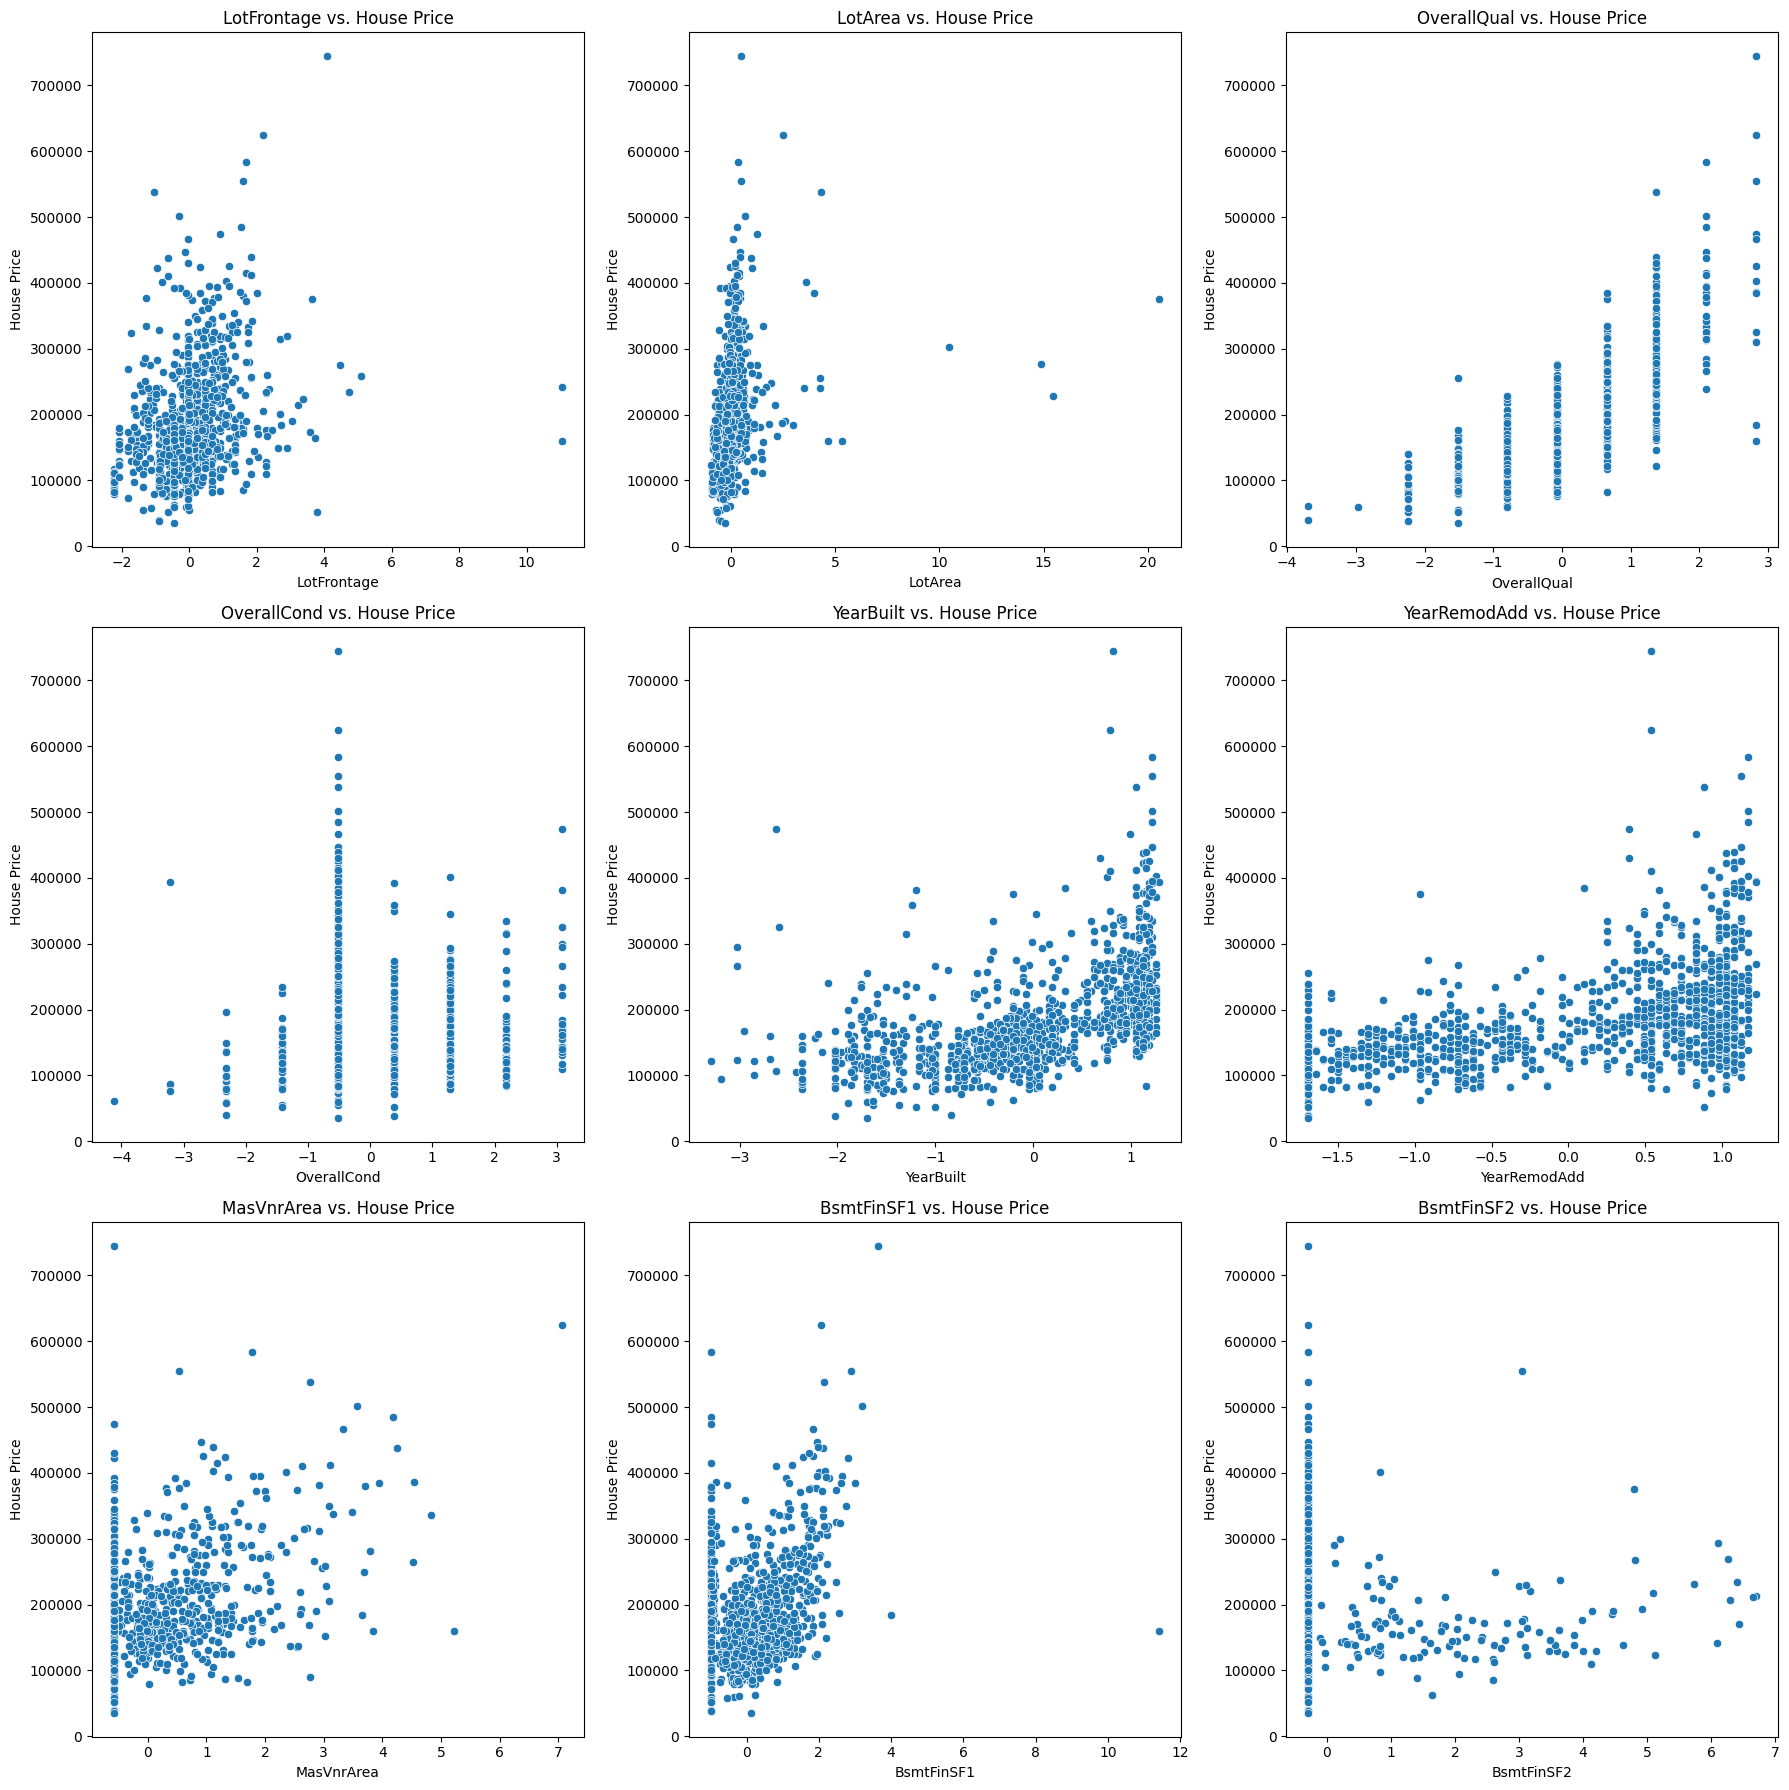

In [5]:
anly.visualize_data(X_train , y_train , features)

In [6]:
# Train models
models = anly.train_linear_models(X_train, y_train)
models

{'linear': LinearRegression(),
 'ridge': Ridge(),
 'lasso': Lasso(),
 'elastic_net': ElasticNet()}

In [7]:
# Perform cross-validation
cv_results = {}
for name, model in models.items():
  cv_results[name] = anly.perform_cross_validation(model, X_train, y_train)
cv_results

{'linear': {'mean_mse': 1863869367.1076622,
  'std_mse': 635525054.7444488,
  'mean_r2': 0.6913221827001964,
  'std_r2': 0.08018472428104857},
 'ridge': {'mean_mse': 1863368648.6382809,
  'std_mse': 634598835.9957459,
  'mean_r2': 0.691398310316439,
  'std_r2': 0.08004152394361026},
 'lasso': {'mean_mse': 1863828420.1337066,
  'std_mse': 635435366.9819341,
  'mean_r2': 0.6913282560170394,
  'std_r2': 0.08017110046193356},
 'elastic_net': {'mean_mse': 2013497964.3363547,
  'std_mse': 453729017.92621225,
  'mean_r2': 0.6643232666982971,
  'std_r2': 0.050159726405587336}}

In [8]:
# Tune hyperparameters
best_params = anly.tune_model_parameters(X_train,y_train)
best_params

{'ridge': {'alpha': 10},
 'lasso': {'alpha': 100},
 'elastic_net': {'alpha': 0.1, 'l1_ratio': 0.5}}

In [9]:
# Train final models with best parameters
final_models = {
  'ridge': Ridge(**best_params['ridge']).fit(X_train , y_train),
  'lasso': Lasso(**best_params['lasso']).fit(X_train , y_train),
  'elastic_net': ElasticNet(**best_params['elastic_net']).fit(X_train , y_train)
}
anly.evaluate_models( final_models , X_test , y_test )

{'ridge': {'MSE': 1901788291.471418,
  'RMSE': 43609.49772092563,
  'MAE': 27992.362520746734,
  'R2': 0.7520590076482752},
 'lasso': {'MSE': 1901408402.0172796,
  'RMSE': 43605.14192176514,
  'MAE': 28020.186431815833,
  'R2': 0.752108534805775},
 'elastic_net': {'MSE': 1926531802.3111296,
  'RMSE': 43892.27497306479,
  'MAE': 27943.18398461305,
  'R2': 0.748833133002093}}

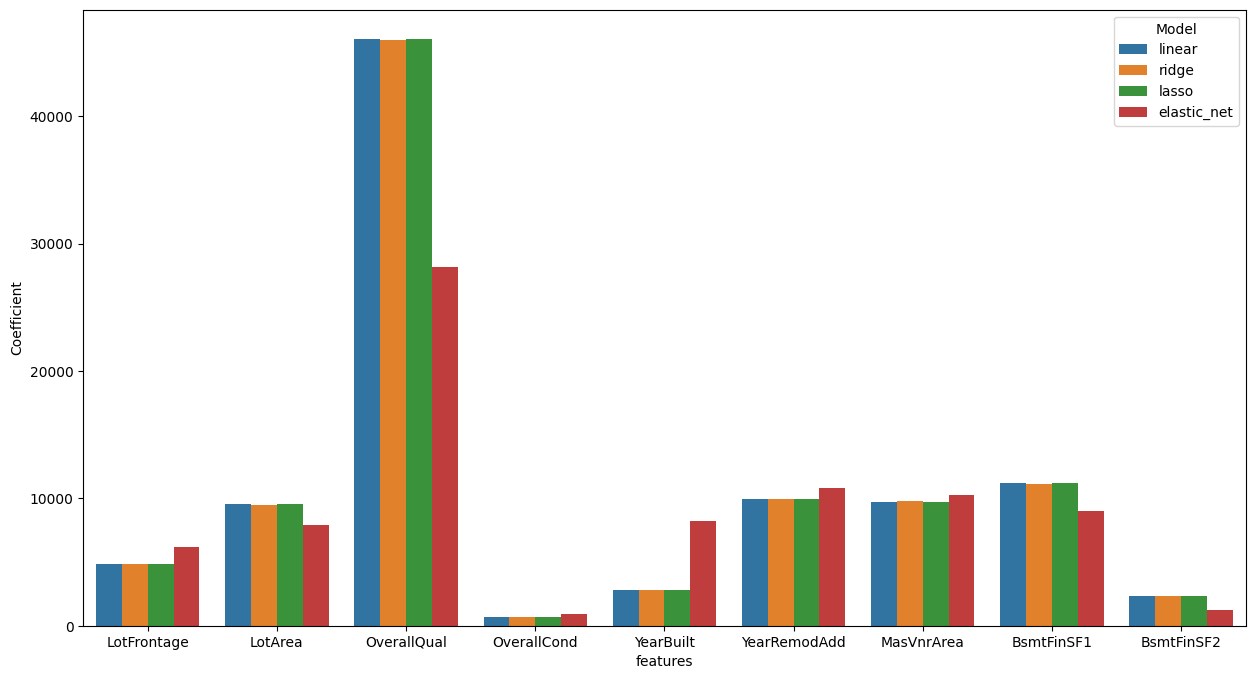

In [10]:
## Visualize
anly.visualize_coefficients(models,features)

In [11]:
df = anly.select_features()
df.index

/home/lucas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.712e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
/home/lucas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.844e+10, tolerance: 5.716e+08
  model = cd_fast.enet_coordinate_descent(
/home/lucas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'GarageQual_Fa', 'GarageCond_TA', 'PoolQC_Ex', 'Fence_GdPrv',
       'Fence_MnPrv', 'SaleType_COD', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Alloca', 'SaleCondition_Partial'],
      dtype='object', length=111)